## (1) 텐서플로우 or 파이토치

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

In [53]:
train_data = pd.read_csv("planets_train.csv")
test_data = pd.read_csv("planets_test.csv")
train_data = train_data.iloc[:,1:]
test_data = test_data.iloc[:,1:]

In [54]:
train_data

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,4,241.258000,1.98100,13.47,1999
1,Transit,1,1.337118,NaN,NaN,2011
2,Transit,1,1.573292,NaN,350.00,2012
3,Radial Velocity,2,3000.000000,NaN,NaN,2014
4,Radial Velocity,1,9.494000,0.02600,21.30,2010
...,...,...,...,...,...,...
746,Radial Velocity,1,772.000000,2.70000,127.88,2011
747,Radial Velocity,1,829.000000,0.80000,32.70,2001
748,Radial Velocity,1,3.092500,0.95000,27.05,2000
749,Transit,2,27.402000,NaN,NaN,2012


In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          751 non-null    object 
 1   number          751 non-null    int64  
 2   orbital_period  725 non-null    float64
 3   mass            376 non-null    float64
 4   distance        588 non-null    float64
 5   year            751 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 35.3+ KB


In [56]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          285 non-null    object 
 1   number          285 non-null    int64  
 2   orbital_period  268 non-null    float64
 3   mass            138 non-null    float64
 4   distance        221 non-null    float64
 5   year            285 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 13.5+ KB


In [44]:
train_data["method"].unique()

array(['Radial Velocity', 'Transit', 'Transit Timing Variations',
       'Imaging', 'Microlensing', 'Eclipse Timing Variations',
       'Pulsar Timing', 'Orbital Brightness Modulation', 'Astrometry'],
      dtype=object)

In [45]:
def label_set(data):
    temp_data = data
    for i in range(len(temp_data)):
        lab = temp_data.loc[i,"method"]
        if lab == "Radial Velocity":
            continue
        elif lab == "Transit":
            continue
        else:
            temp_data.loc[i,"method"] = "others"
    return temp_data    

In [46]:
train = label_set(train_data)
test = label_set(test_data)

In [533]:
train["method"].unique()

array(['Radial Velocity', 'Transit', 'others'], dtype=object)

Class=Radial Velocity, n=409 (54.460719041278296%)
Class=Transit, n=283 (37.68308921438083%)
Class=others, n=59 (7.8561917443408795%)


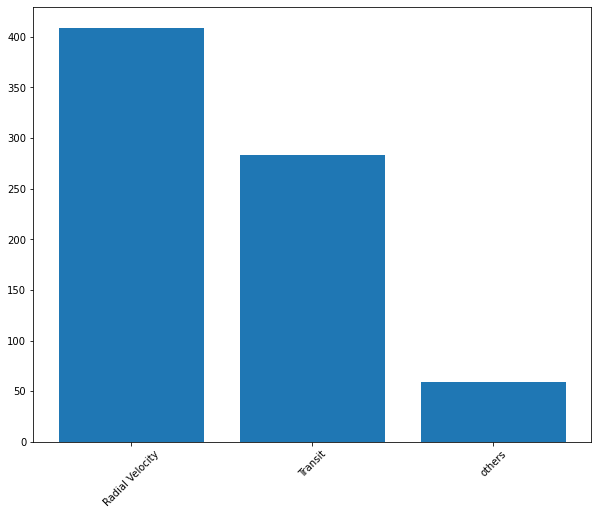

In [57]:
from collections import Counter
def count_and_plot(y):
    counter = Counter(y)
    for k,v in counter.items():
        print("Class={}, n={} ({}%)".format(k,v,v/len(y)*100))
    plt.figure(figsize=(10,8))
    plt.bar(counter.keys(),counter.values())
    plt.xticks(rotation=45)
    plt.show()
count_and_plot(train['method'])

In [58]:
trainset = train.interpolate()
testset = test.interpolate()

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [61]:
trainset

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,4,241.258000,1.98100,13.470,1999
1,Transit,1,1.337118,1.49225,181.735,2011
2,Transit,1,1.573292,1.00350,350.000,2012
3,Radial Velocity,2,3000.000000,0.51475,185.650,2014
4,Radial Velocity,1,9.494000,0.02600,21.300,2010
...,...,...,...,...,...,...
746,Radial Velocity,1,772.000000,2.70000,127.880,2011
747,Radial Velocity,1,829.000000,0.80000,32.700,2001
748,Radial Velocity,1,3.092500,0.95000,27.050,2000
749,Transit,2,27.402000,0.50159,17.935,2012


In [184]:
x_train = trainset.iloc[:,1:]
x_test = testset.iloc[:,1:]

y_train = trainset.iloc[:,0]
y_test = testset.iloc[:,0]

## 정규화

In [185]:
mm = MinMaxScaler()
ss = StandardScaler()
train_x = ss.fit_transform(x_train)
test_x = ss.fit_transform(x_test)

In [888]:
train_x

tensor([[ 1.9394, -0.0748, -0.1954, -0.3651, -2.4230],
        [-0.6173, -0.0829, -0.3443, -0.1215,  0.5187],
        [-0.6173, -0.0829, -0.4932,  0.1221,  0.7638],
        ...,
        [-0.6173, -0.0828, -0.5095, -0.3455, -2.1779],
        [ 0.2349, -0.0820, -0.6461, -0.3587,  0.7638],
        [ 0.2349, -0.0804, -0.7827, -0.3719,  0.5187]])

In [186]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_y = encoder.fit_transform(y_train)
train_y = pd.get_dummies(train_y).values

test_y = encoder.fit_transform(y_test)
test_y = pd.get_dummies(test_y).values

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [889]:
train_y

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

#### [1,0,0] : Radial Velocity, [0,1,0] : Transit, [0,0,1] : Others

In [210]:
Labels = {0:"Radial Velocity",1:"Transit",2:"Others"}

In [187]:
train_x = torch.from_numpy(train_x).float()
test_x = torch.from_numpy(test_x).float()
train_y = torch.from_numpy(train_y).float()
test_y = torch.from_numpy(test_y).float()

In [188]:
train_dataset = TensorDataset(train_x,train_y)
test_dataset = TensorDataset(test_x,test_y)

In [189]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

In [190]:
len(train_dataset)

751

## Model

In [905]:
class PytorchNet(nn.Module):
        def __init__(self,n_input = 5, n_output=3):
            super(Net,self).__init__()
            self.n_in = n_input
            self.n_out = n_output
            self.fc1 = nn.Linear(self.n_in,32)
            self.fc2 = nn.Linear(32,512)
            self.fc3 = nn.Linear(512,self.n_out)
            self.relu = nn.ReLU()
            self.dropout = nn.Dropout(0.5)
            self.softmax = nn.Softmax(dim=1)
        
        def forward(self,x):
            out = self.relu(self.fc1(x))
            out = self.relu(self.fc2(out))
            out = self.dropout(out)
            out = self.softmax(self.fc3(out))
            
            return out
        

In [903]:
model = PytorchNet(5,3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.001)
Epochs = 30

TypeError: __init__() missing 1 required positional argument: 'output_size'

In [904]:
model

Net(
  (fc1): Linear(in_features=5, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (softmax): Softmax(dim=1)
)

In [201]:
model.train()
loss_list = []
acc_list = []
for epoch in range(Epochs):
    running_loss = 0.0
    running_acc = 0
    
    print("Epoch {}/{}".format(epoch+1, Epochs))
    for i, data in enumerate(train_loader,0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)

        _,preds = torch.max(outputs,1)
        _,lab = torch.max(labels,1)        
        
        
        loss = criterion(outputs, lab)
        loss.backward()
        optimizer.step()
        

        running_loss += loss.item()
        running_acc += torch.sum(preds==lab.data)
    
    epoch_loss = running_loss/len(train_dataset)
    epoch_acc = running_acc.double() / len(train_dataset)
    loss_list.append(epoch_loss)
    acc_list.append(epoch_acc)
    
    print("Loss : {}, ACC : {}".format(epoch_loss,epoch_acc))

Epoch 1/30
Loss : 0.031953979268689925, ACC : 0.5539280958721704
Epoch 2/30
Loss : 0.028514133947349578, ACC : 0.6671105193075899
Epoch 3/30
Loss : 0.026957973103707386, ACC : 0.7376830892143809
Epoch 4/30
Loss : 0.025964141368231032, ACC : 0.7536617842876165
Epoch 5/30
Loss : 0.025576594190178475, ACC : 0.7643142476697736
Epoch 6/30
Loss : 0.025249014522994405, ACC : 0.7656458055925432
Epoch 7/30
Loss : 0.024922842827046442, ACC : 0.7762982689747004
Epoch 8/30
Loss : 0.02475342087040887, ACC : 0.7816245006657789
Epoch 9/30
Loss : 0.02445968989525908, ACC : 0.7802929427430093
Epoch 10/30
Loss : 0.024496174128490505, ACC : 0.796271637816245
Epoch 11/30
Loss : 0.024316866848662435, ACC : 0.7976031957390146
Epoch 12/30
Loss : 0.024192169804706395, ACC : 0.800266311584554
Epoch 13/30
Loss : 0.02410453677018695, ACC : 0.8069241011984021
Epoch 14/30
Loss : 0.023834390741848597, ACC : 0.8095872170439414
Epoch 15/30
Loss : 0.02371331997781238, ACC : 0.8069241011984021
Epoch 16/30
Loss : 0.0236

In [206]:
model.eval()
test_loss = 0.0
test_acc= 0
pred_list = []
label_list = []
for data in test_loader:
    inputs, labels = data
    outputs = model(inputs)
    _,preds = torch.max(outputs,1)
    _,lab = torch.max(labels,1)
    
    loss = criterion(outputs, lab)
    
    test_loss += loss.item()
    test_acc += torch.sum(preds==lab.data)

    pred_list.extend([p for p in preds.tolist()])
    label_list.extend(lab.tolist())
    
test_loss = test_loss/len(test_dataset)
test_acc = test_acc.float()/len(test_dataset)
print("Loss : {}, ACC : {}".format(test_loss, test_acc))

Loss : 0.023757115581579377, ACC : 0.7894737124443054


[Text(0, 0.5, 'Radial Velocity'),
 Text(0, 1.5, 'Transit'),
 Text(0, 2.5, 'Others')]

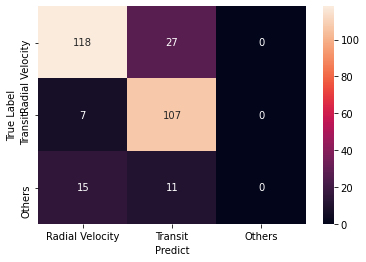

In [258]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

classes = [Labels[0],Labels[1],Labels[2]]

cm = confusion_matrix(label_list,pred_list)
c = sns.heatmap(cm,annot=True,fmt='g')
c.set(ylabel = "True Label", xlabel = "Predict")
c.set_xticklabels(classes)
c.set_yticklabels(classes)

## Numpy 구현

In [509]:
class Linear():
    def __init__(self,n,m,init_method="xavier"): # n : 다음 레이어 노드 수, m : 이전 레이어 노드 수
        self.parameter = {}
        self.init_method = init_method
        if self.init_method == "xavier":
            self.parameter["W"], self.parameter["b"] = self.init_xavier_weights(n,m)
        
        elif self.init_method == "he":
            self.parameter["W"], self.parameter["b"] = self.init_he_weights(n,m)
        
        self.dp = {}
        self.dp['W'], self.dp['b'] = ('None','None')
        self.x = None
        
    def init_xavier_weights(self,n,m):
        W = np.sqrt(1./n)*np.random.randn(n,m)
        b = np.zeros(m)
        return(W,b)
    
    def init_he_weights(self,n,m):
        W = np.sqrt(2./n)*np.random.randn(n,m)
        b = np.zeros(m)
        return (W,b)
    
    
    def forward(self,x):
        W,b = self.load()
        self.x = x
        y = np.dot(x,W) +b
        return y
    
    def backward(self,dy):
        W,b = self.load()
        x = self.x
        self.dp['W'] = np.dot(x.T, dy)
        self.dp['b'] = np.sum(dy,axis=0)
        dx = np.dot(dy,W.T)
        return dx
    
    def load(self):
        return (self.parameter['W'],self.parameter['b'])
    

In [535]:
class ReLU():
    def __init__(self):
        self.parameter = {}
        self.mask = None
    
    def forward(self,x):
        y = x.copy()
        mask = (x<0)
        self.mask = mask
        y[mask] = 0 
        return y
    
    def backward(self,dy):
        mask=self.mask
        dx = dy.copy()
        dx[mask] = 0
        return dx
    

In [522]:
eps = 1e-8
class CrossEntropyWithSoftmax():
    def __init__(self,reduction=True):
        self.parameter = {}
        self.t = None
        self.y = None
        self.reduction = reduction
        
    def forward(self,t,x):
        self.t = t
        expx = np.exp(x-np.max(x))
        y = expx/np.sum(expx,axis=1,keepdims=True)
        self.y = y

        loss = t*np.log(eps+y)
        if self.reduction:
            loss = -np.sum(loss)
        else:
            loss =-np.sum(loss,axis=1)
        return (loss,y)
    
    def backward(self,dy):
        t = self.t
        y = self.y
        return y-t

In [538]:
import collections
class TwoLayerFNN():
    def __init__(self):
        self.parameter = collections.OrderedDict()
        self.parameter['linear1'] = Linear(5,32,'he')
        self.parameter['relu']=ReLU()
        self.parameter['linear2'] = Linear(32,512,'xavier')
        self.parameter['relu2']=ReLU()
        self.parameter['linear3'] = Linear(512,3,'he')

        self.lastlayer = CrossEntropyWithSoftmax()
        
    def forward(self,x):
        parameter = self.parameter
        for layer in parameter.keys():
            x = parameter[layer].forward(x)
        return x
    
    def backward(self,dy):
        parameter = self.parameter
        for layer in reversed(parameter.keys()):
            dy = parameter[layer].backward(dy)
        return dy
    
    def predict(self,x):
        for layer in self.layers.values():
            x= layer.forward(x)    
        return x
    
    def loss(self,x,t):
        y = self.predict(x)
        return self.lastlayer.forward(y,t)
    
    def gradient(self,x,t):
        self.loss(x,t)
        
        dout=1
        dout = self.lastlayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        grads={}
        grads['W1'] = self.parameter['linear1'].dw
        grads['b1'] = self.parameter['linear1'].db
        grads['W2'] = self.parameter['linear2'].dw
        grads['b2'] = self.parameter['linear2'].db
        grads['W3'] = self.parameter['linear3'].dw
        grads['b3'] = self.parameter['linear3'].db
        
        return grads

In [534]:
class Adam:
    def __init__(self,lr=0.001, beta1=0.9, beta2=0.99):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self,params,grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
                
        self.iter = 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)
        
        for key in params.keys():
            self.m[key] += (1-self.beta1) * (grads[key]-self.m[key])
            self.v[key] += (1-self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key])+1e-7)

In [524]:
def accuracy(y_batch, t_batch):
    ylb = np.argmax(y_batch,axis=1)
    tlb = np.argmax(t_batch,axis=1)
    return np.mean(ylb==tlb)*100

def numerical_gradient(f,x):
    dx = 1e-4
    df = np.empty_like(x)
    if x.ndim == 1:
        for i in range(len(x)):
            org_x = x[i]
            x[i] = org_x + dx
            fx1 = f(x)
            x[i] = org_x - dx
            fx2 = f(x)
            x[i] = org_x
            df[i] (fx1-fx2)/(2.*dx)
    
    elif x.dim==2:
        m,n = x.shape
        for i in range(m):
            org_x = x[i,j]
            x[i,j] = org_x + dx
            fx1 = f(x)
            x[i,j] = org_x = dx
            fx2 = f(x)
            x[i,j] = org_x
            df[i,j] = (fx1-fx2)/(2.*dx)
    return df


## 학습 코드

In [525]:
fnn = TwoLayerFNN()
loss_layer = CrossEntropyWithSoftmax()

lr = 0.001
N = len(train)
batch_size = 32
epoch_tnum = 30
iter_tnum = int(N/batch_size)

In [527]:
def forward(fnn,loss_layer, data_x, data_t):
    data_x = np.array(data_x)
    data_t = np.array(data_t)
    
    x_batch = data_x.copy()
    x_batch = x_batch.reshape([len(data_x),-1])
    t_batch = data_t
    
    y_batch = fnn.forward(x_batch)
    
    loss,_ = loss_layer.forward(t_batch,y_batch)
    loss = loss/len(x_batch)
    
    acc = accuracy(y_batch,t_batch)
    return (loss,acc)

def backward(fnn,loss_layer):
    dy = loss_layer.backward(1)
    fnn.backward(dy)
    

In [ ]:
iter_num = int(N/batch_size)

In [528]:
for epoch in range(epoch_tnum):
    for j in range(iter_num):
        
        iter_n = batch_size * j
        x_batch = train_x[iter_n:(iter_n+batch_size)]
        t_batch = train_y[iter_n:(iter_n+batch_size)]
        
        loss,acc = forward(fnn,loss_layer,x_batch,t_batch)
        
        backward(fnn,loss_layer)
        
#         for layer in fnn.parameter.keys():
#             layer_ = fnn.parameter[layer]
#             param = layer_.parameter
            
#             for w in param.keys():
#                 dw = layer_.dp[w]
#                 param[w] -= lr * dw
        for layer in fnn,parameter.keys():
            layer_ = fnn.parameter[layer]
            param = layer_.parameter
            grads = 
        
        
                
        
    train_loss, train_acc = forward(fnn,loss_layer,train_x,train_y)
    validate_loss,validate_acc = forward(fnn,loss_layer,test_x,test_y)
    
    print("***%2dth epoch"%epoch)
    print("Train set -> loss : %f, Acc : %5.2f%%"%(train_loss,train_acc))
    print("Validation set -> loss : %f, Acc : %5.2f%%"%(validate_loss,validate_acc))

*** 0th epoch
Train set -> loss : 0.667240, Acc : 75.10%
Validation set -> loss : 0.687032, Acc : 75.44%
*** 1th epoch
Train set -> loss : 0.638770, Acc : 77.10%
Validation set -> loss : 0.635519, Acc : 76.84%
*** 2th epoch
Train set -> loss : 0.613596, Acc : 78.16%
Validation set -> loss : 0.614330, Acc : 78.25%
*** 3th epoch
Train set -> loss : 0.596850, Acc : 78.56%
Validation set -> loss : 0.601672, Acc : 77.89%
*** 4th epoch
Train set -> loss : 0.583648, Acc : 78.43%
Validation set -> loss : 0.592824, Acc : 78.95%
*** 5th epoch
Train set -> loss : 0.572883, Acc : 79.09%
Validation set -> loss : 0.586692, Acc : 78.95%
*** 6th epoch
Train set -> loss : 0.564152, Acc : 79.36%
Validation set -> loss : 0.582702, Acc : 78.60%
*** 7th epoch
Train set -> loss : 0.556654, Acc : 80.03%
Validation set -> loss : 0.580240, Acc : 78.95%
*** 8th epoch
Train set -> loss : 0.550046, Acc : 80.29%
Validation set -> loss : 0.578977, Acc : 78.95%
*** 9th epoch
Train set -> loss : 0.544088, Acc : 80.69

In [529]:
test_loss, test_acc = forward(fnn, loss_layer, test_x, test_y)
print('Test set -> loss : %f, Acc : %5.2f%%'%(test_loss,test_acc))

Test set -> loss : 0.659060, Acc : 80.00%


In [531]:
tlab = []
plab = []
for i in range(len(test_x)):
    x_1 = np.array(test_x[i].reshape([1,-1]))
    t = np.array(test_y[i])
    
    z = fnn.forward(x_1)
    _,y = loss_layer.forward(t,z)
    
    t = np.argmax(t)
    y = np.argmax(y)
    tlab.append(t)
    plab.append(y)
#     print('answer: %d, prediction :%d'%(t,y))

answer: 0, prediction :0
answer: 1, prediction :1
answer: 1, prediction :1
answer: 2, prediction :1
answer: 1, prediction :1
answer: 2, prediction :2
answer: 0, prediction :2
answer: 2, prediction :2
answer: 0, prediction :0
answer: 2, prediction :2
answer: 2, prediction :2
answer: 1, prediction :1
answer: 0, prediction :0
answer: 1, prediction :0
answer: 0, prediction :0
answer: 0, prediction :0
answer: 1, prediction :1
answer: 0, prediction :0
answer: 0, prediction :0
answer: 0, prediction :0
answer: 0, prediction :2
answer: 2, prediction :0
answer: 0, prediction :1
answer: 0, prediction :0
answer: 1, prediction :1
answer: 0, prediction :1
answer: 0, prediction :0
answer: 1, prediction :1
answer: 1, prediction :0
answer: 0, prediction :2
answer: 2, prediction :2
answer: 0, prediction :2
answer: 1, prediction :0
answer: 1, prediction :1
answer: 0, prediction :0
answer: 1, prediction :1
answer: 0, prediction :0
answer: 1, prediction :1
answer: 1, prediction :1
answer: 1, prediction :1


[Text(0, 0.5, 'Radial Velocity'),
 Text(0, 1.5, 'Transit'),
 Text(0, 2.5, 'Others')]

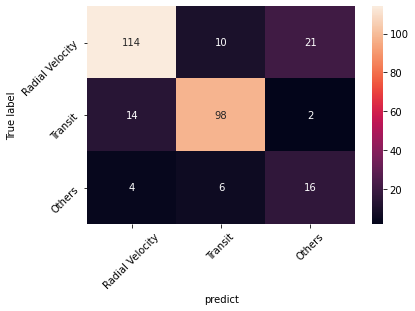

In [532]:
cm = confusion_matrix(tlab,plab)
c=sns.heatmap(cm,annot=True,fmt='g')
c.set(xlabel = "predict" , ylabel = "True label")
c.set_xticklabels(classes,rotation=45)
c.set_yticklabels(classes,rotation=45)

# ---------------------------------------

In [821]:
class Affine:
    def __init__(self,W,b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        self.dw = None
        self.db = None
    
    def backward(self,dout):
        dx = np.dot(dout,self.W.T)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx
    
    def forward(self,x):

        self.x = x
        out = np.dot(self.x,self.W) + self.b
        return out

In [822]:
class ReLU():
    def __init__(self):
        self.parameter = {}
        self.mask = None
    
    def forward(self,x):
        y = x.copy()
        mask = (x<0)
        self.mask = mask
        y[mask] = 0 
        return y
    
    def backward(self,dy):
        mask=self.mask
        dx = dy.copy()
        dx[mask] = 0
        return dx
    

In [845]:
class Adam:
    def __init__(self,lr=0.001, beta1=0.9, beta2=0.99):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self,params,grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
                
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)
        
        for key in params.keys():
            self.m[key] += (1-self.beta1) * (grads[key]-self.m[key])
            self.v[key] += (1-self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

In [911]:
class Dropout:
    def __init__(self,dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self,x, train_flag = True):
        if train_flag:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0-self.dropout_ratio)
    
    def backward(self, dout):
        return dout * self.mask

In [912]:
eps = 1e-8
class CrossEntropyWithSoftmax():
    def __init__(self,reduction=True):
        self.parameter = {}
        self.t = None
        self.y = None
        self.reduction = reduction
        
    def forward(self,t,x):
        self.t = t
        expx = np.exp(x-np.max(x))
        y = expx/np.sum(expx,axis=1,keepdims=True)
        self.y = y
        
        loss = t*np.log(eps+y)
        if self.reduction:
            loss = -np.sum(loss)
        else:
            loss =-np.sum(loss,axis=1)
        return (y,loss)
    
    def backward(self,dy):
        t = self.t
        y = self.y
        return y-t

In [913]:
class Net():
    def __init__(self, input_size, hidden_size_list, output_size,
                activation='relu', weight_init_std = 'he', weight_decay_lambda=0,
                use_dropout=False, dropout_ration = 0.5):
        
        self.input_size = input_size
        self.hidden_size_list = hidden_size_list
        self.output_size = output_size
        self.hidden_layer_num = len(hidden_size_list)
        self.use_dropout = use_dropout
        self.weight_decay_lambda = weight_decay_lambda
        self.params ={}
        
        self.__init_weight(weight_init_std)
        
        activation_layer = {'relu':ReLU}
        self.layers = collections.OrderedDict()
        
        for idx in range(1,self.hidden_layer_num+1):
            self.layers['Affine'+str(idx)] = Affine(self.params['W'+str(idx)],
                                                   self.params['b'+str(idx)])
            
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
            if self.use_dropout:
                self.layers['Dropout'+str(idx)] = Dropout(dropout_ration)
                
        
        idx = self.hidden_layer_num+1
        self.layers['Affine' + str(idx)] = Affine(self.params['W'+str(idx)],
                                                 self.params['b'+str(idx)])
        
        self.last_layer = CrossEntropyWithSoftmax()
        
    def __init_weight(self,weight_init_std):
        
        all_size_list = [self.input_size]+self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu','he'):
                scale = np.sqrt(2.0/all_size_list[idx-1])
            elif str(weight_init_std).lower() in ('sigmoid','xavier'):
                scale = np.sqrt(1.0/all_size_list[idx-1])
            self.params['W'+str(idx)] = scale*np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b'+str(idx)] = np.zeros(all_size_list[idx])
            
    def predict(self,x,train_flag = False):
        for key,layer in self.layers.items():
            if "Dropout" in key or "BacthNorm" in key:
                x = layer.forward(x,train_flag)
            else:
                x = layer.forward(x)
        return x
    
    def loss(self,x,t,train_flag = False):
        y = self.predict(x,train_flag)
        weight_decay = 0
        
        for idx in range(1,self.hidden_layer_num+2):
            W = self.params['W'+str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
        _,temp = self.last_layer.forward(t,y)
        return  temp + weight_decay
    
    def accuracy(self,X,T):
        Y = self.predict(X, train_flag = False)
#         if T.ndim !=1:
#             T = np.argmax(T,axis=1)

        Y,_ = self.last_layer.forward(T,Y)
        Y = np.argmax(Y,axis=1)
        T = np.argmax(T,axis=1)
        accuracy = np.mean(Y==T)*100
        return (Y,accuracy)
    


    def numerical_gradient(self,X,T):
        loss_W = lambda W: self.loss(X,T,train_flag = True)
        grads = {}
        
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W'+str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b'+str(idx)])
            
        return grads
    
    def gradient(self,x,t):
        self.loss(x,t,train_flag = True)
        
        dout = 1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        
        grads = {}
        for idx in range(1,self.hidden_layer_num +2):
            grads['W' + str(idx)] = self.layers['Affine'+str(idx)].dw + self.weight_decay_lambda *self.params['W'+str(idx)]
            grads['b' + str(idx)] = self.layers['Affine'+str(idx)].db
            
        return grads

In [922]:
network = Net(input_size = 5, hidden_size_list = [32,512],output_size = 3,use_dropout=True)

In [923]:
optimizer = Adam(lr=0.01)
iter_num = int(N/batch_size)
Epochs = 20
batch_size = 32

In [924]:
preds_list = []
loss_list = []
for epoch in range(Epochs):
    train_acc_batch = 0.0
    test_acc_batch = 0.0
    loss_temp = 0.0
    for j in range(iter_num):
        iter_n = batch_size * j
        x_batch = np.array(train_x)[iter_n:(iter_n+batch_size)]
        t_batch = np.array(train_y)[iter_n:(iter_n+batch_size)]
        
        loss_temp += network.loss(x_batch,t_batch)
        
        grads = network.gradient(x_batch,t_batch)
        optimizer.update(network.params, grads)
        
        _,acc_tr = network.accuracy(x_batch, t_batch)
        preds, acc_te = network.accuracy(np.array(test_x),np.array(test_y))
        train_acc_batch += acc_tr
        test_acc_batch += acc_te
        if (epoch == Epochs-1) and(j == iter_num-1):
            preds_list.extend(preds)
    train_loss = loss_temp / iter_num
    train_acc = train_acc_batch / iter_num
    test_acc = test_acc_batch / iter_num
    loss_list.append(train_loss)
    
    print("***%2dth epoch"%(epoch+1))
    print("Loss : {}".format(train_loss))
    print("Train acc : {}, Test acc : {}".format(train_acc, test_acc))
#     print("Train set -> loss : %f, Acc : %5.2f%%"%(train_loss,train_acc))
#     print("Validation set -> loss : %f, Acc : %5.2f%%"%(validate_loss,validate_acc))
    

*** 1th epoch
Loss : 26.70591496222265
Train acc : 70.2445652173913, Test acc : 62.593440122044235
*** 2th epoch
Loss : 20.49960500335046
Train acc : 75.54347826086956, Test acc : 71.19755911517926
*** 3th epoch
Loss : 19.51989902640583
Train acc : 76.90217391304348, Test acc : 72.49427917620137
*** 4th epoch
Loss : 19.0332454839893
Train acc : 77.85326086956522, Test acc : 72.4790236460717
*** 5th epoch
Loss : 18.60474304476591
Train acc : 77.44565217391305, Test acc : 74.17238749046528
*** 6th epoch
Loss : 18.226888709364232
Train acc : 79.21195652173913, Test acc : 77.29977116704806
*** 7th epoch
Loss : 17.687574176079398
Train acc : 80.70652173913044, Test acc : 76.90312738367658
*** 8th epoch
Loss : 17.169404909981182
Train acc : 79.7554347826087, Test acc : 76.88787185354691
*** 9th epoch
Loss : 16.710465505232744
Train acc : 81.25, Test acc : 76.4454614797864
***10th epoch
Loss : 16.90954042094333
Train acc : 81.25, Test acc : 77.34553775743707
***11th epoch
Loss : 16.0975401836

In [857]:
true_label= np.array(test_y)
tl_list=true_label.argmax(axis=1)

[Text(0, 0.5, 'Radial Velocity'),
 Text(0, 1.5, 'Transit'),
 Text(0, 2.5, 'Others')]

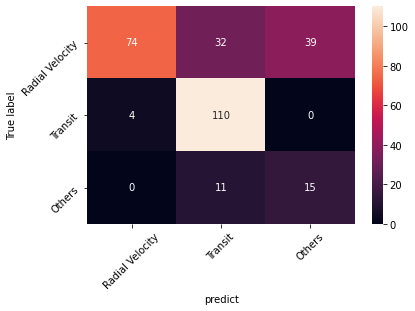

In [886]:
cm = confusion_matrix(tl_list,preds_list)
c=sns.heatmap(cm,annot=True,fmt='g')
c.set(xlabel = "predict" , ylabel = "True label")
c.set_xticklabels(classes,rotation=45)
c.set_yticklabels(classes,rotation=45)